Nilai Modularity: 0.8794240129799878


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(




No 1 Komunitas 0 : ['kantahkaboki', 'ditjentataruang', 'kantahkabmubar']
Banyak Node: 3


No 2 Komunitas 2 : ['kumparan', 'nntweetnn', 'antipki19', 'tempodotco', 'qoirudineki', 'afrchamp', 'sangiranflying', 'berlandgroup', 'tvrinewscom', 'amirelbahriy', 'politik___', 'jamalhabsy']
Banyak Node: 10


No 3 Komunitas 3 : ['jokowi', 'frprayogo', 'syarifiirvan', 'katadatacoid', 'avibkah', 'tmahartomo071', 'didikekky', 'tanlychat', 'cak_x01', 'bentangimaji', '_indonesiamaju_', 'mimi_chimmy', 'retnosetyow4t', 'laingenlisa', 'rahwan_asep', 'penjagajokowi1', 'sudar586028012', 'radiosmartfm', 'cnnindonesia', 'arrayah43832329', 'aswadbaihaqi', 'metro_tv', 'tafdillah', 'franxvvv', 'ykomedian', 'tygrysku_', 'maliqridwane', 'mhaikalfadhil', 'jemmyh8', 'jisatu01', 'gem_1000x', 'rolaskendor', 'dpdgppsultra', 'rommy_ardi', 'rizkiadinp_', 'viksory', 'lydiarumengan', 'andiyulman', 'husainzain25652', 'kiyai_marufamin', 'prabowo', 'uusbustami', 'rahma59429213', 'rayhan_yuda_pra', 'arsikamadja', 'gerbangnk

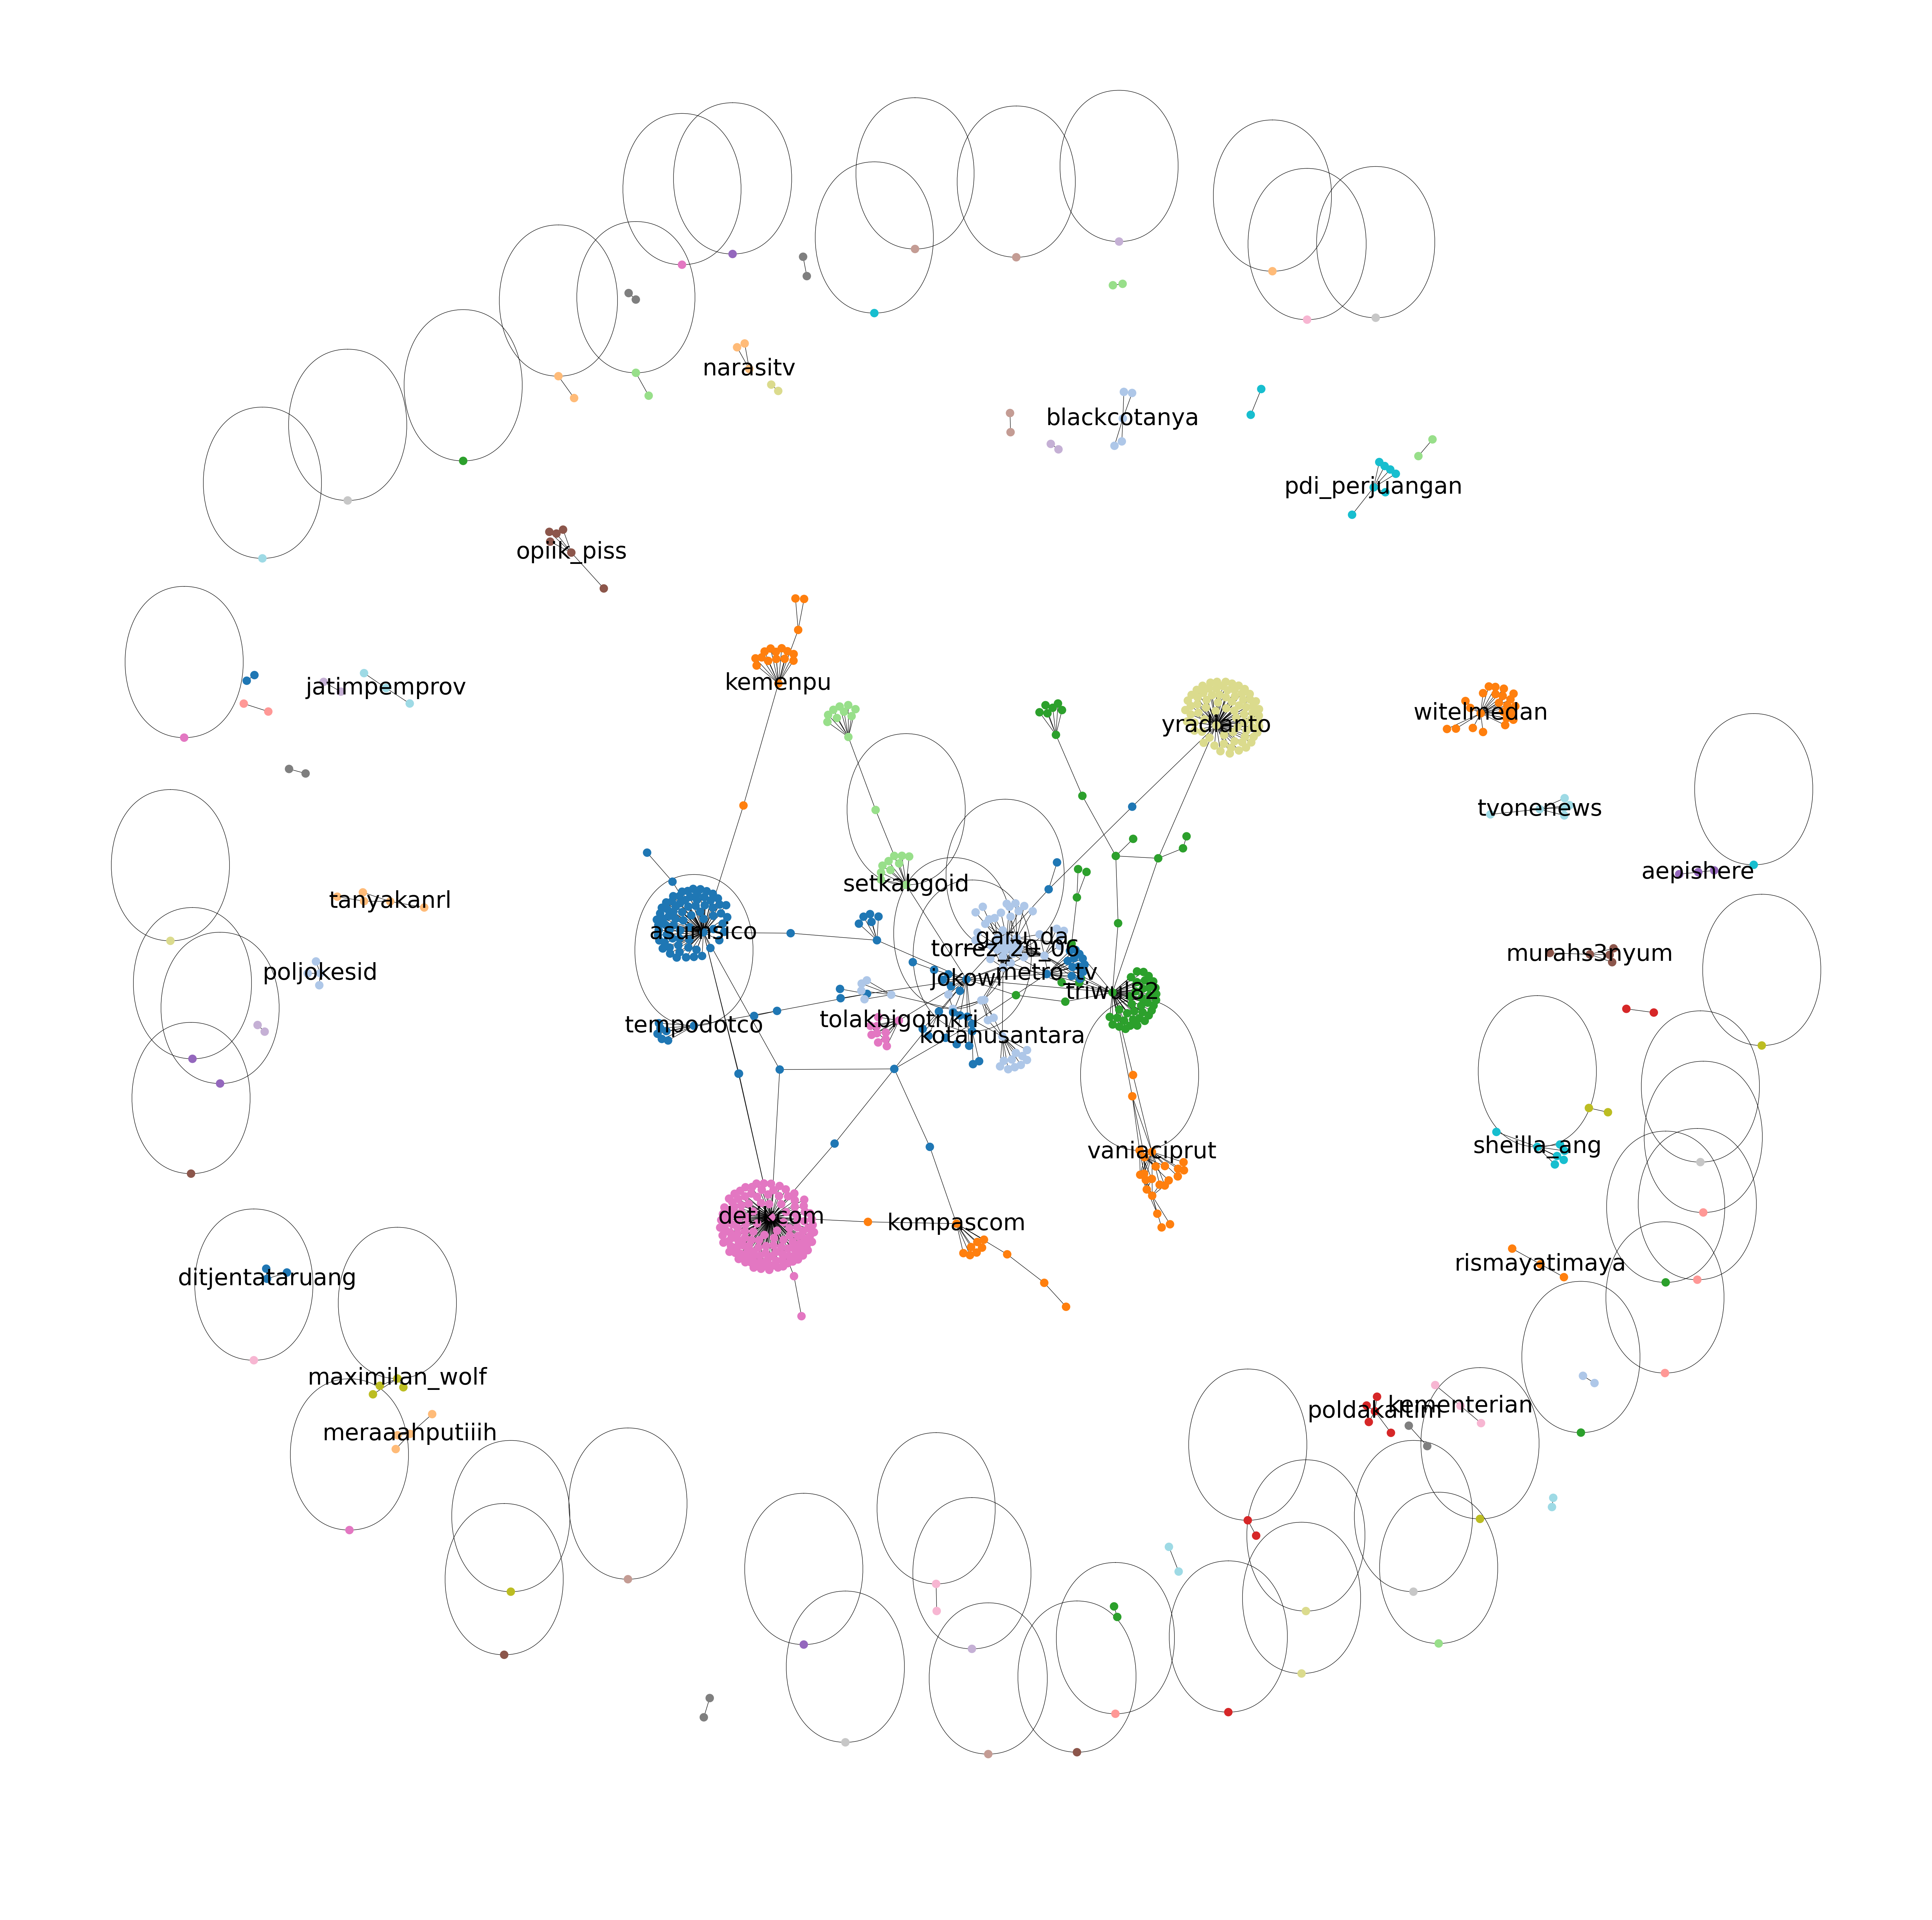

In [44]:
import pandas as pd
import networkx as nx
import community.community_louvain as community
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Membaca data dari file CSV
# data = pd.read_csv('net_IKN_Nusantara.csv')
data = pd.read_csv('net_IKN_Nusantara_New.csv')

# Mengambil kolom kedua dan ketiga
subset_data = data.iloc[:, [1, 2]]

# Membuat graf dari subset data
G = nx.from_pandas_edgelist(subset_data, source='from', target='to')

# Menjalankan algoritma Louvain
partition = community.best_partition(G)

# Menghitung nilai modularity
modularity = community.modularity(partition, G)

# Menampilkan nilai modularity
print("Nilai Modularity:", modularity)

# Mengatur posisi node pada graf
pos = nx.spring_layout(G)

# Mengambil jumlah komunitas
num_communities = max(partition.values()) + 1

# Membuat colormap dengan jumlah warna sesuai jumlah komunitas
cmap = cm.get_cmap('tab20', num_communities)

# Menentukan ukuran canvas
fig, ax = plt.subplots(figsize=(75, 75))

# Menggambar node pada graf dengan warna sesuai komunitas
node_colors = [cmap(partition[node]) for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, ax=ax)

# Menggambar edge pada graf
nx.draw_networkx_edges(G, pos, ax=ax)

# Menampilkan label node dengan font size berdasarkan jumlah degree tertinggi di setiap komunitas
count = 0
max_com = []
arr_com = []
node_degrees_arr = []
max_degree_community = None

font_size=50
for community_id in set(partition.values()):
    community_nodes = [node for node, c_id in partition.items() if c_id == community_id]
    if len(community_nodes) > 2:
        count += 1
        subgraph = G.subgraph(community_nodes)
        node_degrees = dict(subgraph.degree())
        max_degree = max(node_degrees.values())
        labels = {node: node if degree == max_degree else '' for node, degree in node_degrees.items()}
        nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=font_size, ax=ax)
        print("\n")
        print("No", count, "Komunitas", community_id, ":", community_nodes)
        max_com.append(max_degree)
        arr_com.append(community_nodes)
        node_degrees_arr.append(node_degrees)
        
        print("Banyak Node:", max_degree + 1)


#take top 5 degree
max_com.sort(reverse=True)
top5 = max_com[:5]

# Sort the nested lists based on their length in descending order
arr_com.sort(key=len, reverse=True)

# Select the top 2 nested lists
top5node = arr_com[:5]

# Menampilkan jumlah komunitas
max_length_array = max(arr_com, key=len)
max_com_max = max(max_com)+1  # Get the maximum value from max_com list

print("===========================================")
print("Komunitas terbanyak memiliki: ", max_com_max,"Node")
print("Dengan Isi komunitas:", max_length_array)



# Menampilkan hasil visualisasi
plt.axis('off')
plt.show()


In [37]:
print("5 Komunitas dengan node terbanyak:")
for items in top5node:
    print(items)
    print("Banyak Node:", len(items))
    print("===========================================")

5 Komunitas dengan node terbanyak:
['detikcom', 'detik_sulsel', 'prasetiyoep', 'abehanief', 'ockysaputraa', 'ryanbakkaru', 'paidweb3', 'shandyjepret', 'babyjoenadira', 'yuskareem63', 'alimudi84052003', 'sandhey6', 'eknug', 'msmyoibae', 'punyadims', 'rananusantari', 'peterloveyou', 'adc14089', 'chris_azura', 'yanhendrik', 'oktayudhi', 'selasa98', 'fthrtwentyone', 'wztya9', 'damarholic', 'salwafhr30', 'vivacoid', 'ygndini_feb', 'azky_rk', 'imamwahidd', 'koeglodag', 'kurniawanricho', 'skcngwur', 'greenoto', 'zaeni_aditya', 'ifanmayo_', 'mesofullove_', 'yamjonkur', 'langx_wiratama', 'girolyar', 'dimasoemardjono', 'airazal', 'petroeq', 'agnan1923', 'idoymaridoy', 'mxrozaq', 'anang_ssanto', 'sammyfish13', 'vvchrstn', 'gebmoon', 'newsuriteladan', 'streamingdino', 'riofebrian02', 'dadangadi8', 'weiinnn', 'putirwn', 'raaraapo_', 'soobinjateng', 'dvntnggrn', 'juvejack', 'pokemon_udara', 'snowdropbae', 'agusssshhhhh', '1rfantastic', 'iantrucker', 'awindul', 'officialwawan', 'putrosukarno', 'talak

In [38]:
print("Node dengan degree terbanyak:")
# Sort the dictionaries based on their values in descending order
sorted_dicts = sorted(node_degrees_arr, key=lambda x: max(x.values()), reverse=True)
sorted_dicts_highestvalue = [{k: v for k, v in sorted(d.items(), key=lambda x: x[1], reverse=True)} for d in sorted_dicts]
# Print the top two dictionaries
top5nodecommunities = []
for i in sorted_dicts_highestvalue[:5]:
    mostNode=list(i.keys())
    firstMostNode=mostNode[0]
    top5nodecommunities.append(firstMostNode)
    # print(top5nodecommunities)
    print(len(i))
    print(i)
    
print('=====================================')
print('Top 5 Node dengan degree terbanyak:')
print(top5nodecommunities)


Node dengan degree terbanyak:
134
{'detikcom': 132, 'ockysaputraa': 2, 'newsuriteladan': 1, 'punyadims': 1, 'xoneebenaja': 1, 'nell20000': 1, 'kutang_hitam': 1, 'elichika2525': 1, 'limlim672': 1, 'anorexicats': 1, 'girolyar': 1, 'juvejack': 1, 'marcellrudee': 1, 'tsupersubs': 1, '1rfantastic': 1, 'tulip84882930': 1, 'kopimovie': 1, 'soobinjateng': 1, 'andreallian': 1, 'weiinnn': 1, 'vvchrstn': 1, 'raaraapo_': 1, 'idoymaridoy': 1, 'itsaufarfajar': 1, 'agusssshhhhh': 1, 'azky_rk': 1, 'kurniawanricho': 1, 'officialkjti': 1, 'novanpramadi12': 1, 'selasa98': 1, 'riofebrian02': 1, 'retywie': 1, 'kancilcungkring': 1, 'himechwaan': 1, 'rananusantari': 1, 'adoorabie': 1, 'susaaahtidur': 1, 'snowdropbae': 1, 'sammyfish13': 1, 'ziyadu_r': 1, 'msnrng': 1, 'oktayudhi': 1, 'flourentt_cris': 1, 'anang_ssanto': 1, 'streamingdino': 1, 'officialwawan': 1, 'langx_wiratama': 1, 'peterloveyou': 1, 'fthrtwentyone': 1, 'novita_kaunang': 1, 'vitabangun': 1, 'entah3383': 1, 'reskisural': 1, 'ifanmayo_': 1, 'ai

In [39]:
class FindUser:
    def __init__(self, data, user):
        self.data = data
        self.user = user
        self.found = False
        self.reply = None
        self.rt = None
        for i in data.index:
            if(data['author'][i].lower() == self.user):
                self.author = data['author'][i]
                self.title = data['title'][i]
                self.label = data['sentiment_label'][i]
                self.followers = data['user_followers_count'][i]
                self.status_count = data['user_statuses_count'][i]
                self.found = True
                break
            self.author = None
            self.title = None
            self.label = None
            self.followers = None
            self.status_count = None

    def retweet(self):
        retweets = []
        for i in data.index:
            if(str(self.data['retweeted_screen_name'][i]).lower() == self.user):
                retweets.append(self.data['author'][i])
        # if retweets:
        #     return retweets
        return retweets
        # print(self.retweet)
    
    def reply(self):
        replys = []
        for i in data.index:
            user = data['in_reply_to_screen_name'][i]
            if(user == self.user):
                if(self.data['in_reply_to_screen_name'][i] != self.data['author'][i]):
                    replys.append([self.data['author'][i], self.data['description'][i]])
        if replys:
            return replys
        return None



count = 0
for items in top5nodecommunities:
    count= count+1
    data1 = pd.read_csv('IKN_Nusantara_new.csv')
    community = items
    firstuser = items
    user = FindUser(data1, firstuser)
    retweets = user.retweet()
    print(firstuser)
    print("Komunitas", count, ":", community)
    print("User: ", user.author, end="\n")
    print("Followers: ", f"{user.followers:,}", end="\n")
    print("Status Count: ", f"{user.status_count:,}", end="\n")
    print("Tweet: ", user.title, end="\n")
    print("Label: ", user.label, end="\n")
    print("Retweet: ", retweets, end="\n")
    print("Reply: ", user.reply, end="\n")
    print("===========================================")

detikcom
Komunitas 1 : detikcom
User:  detikcom
Followers:  20,178,986
Status Count:  2,206,369
Tweet:  Sebanyak 2.500 Aparatur Sipil Negara (ASN) akan mulai dipindah secara bertahap ke Ibu Kota Negara (IKN) Nusantara, Kalimantan Timur (Kaltim) tahun 2024. #ASN #IKN  Via: @detik_sulsel  https://t.co/ckujwYoIRT
Label:  Positive
Retweet:  ['RyanBakkaru', 'Ockysaputraa', 'abehanief', 'PrasetiyoEp', 'InfoIndonesiaaa', 'EsterSagala4', 'Riandi_12', 'ndrys_', 'XOneeBenaJa', 'ichigo97538820', 'ysbcht_', 'pemudaharapannn', 'andreallian', 'KristyBambooArt', 'astagakenapalu', 'retywie', 'KokoAja4', 'Daffastyaa', 'zerahyaa', 'naeni_romayati', 'Rose_ifntday6', 'Kak_Veronika', 'himechwaan', 'anorexicats', 'msalmanhdr', 'KancilCungkring', 'imanurak_269', 'Officialkjti', 'Akbar_Gremory', 'ArtRegular', 'limlim672', 'novanpramadi12', 'tsupersubs', 'marcellrudee', 'vitabangun', 'ReskisuraL', 'Novita_Kaunang', 'susaaahtidur', 'witaresw', 'nell20000', 'entah3383', 'flourentt_cris', 'itswildanwill', 'ErisaD

In [42]:
#get the sentiment label
new_sub_array = []
test_sub_array = []
sentiment_label = []
for sub_list in top5node:
    for node in sub_list:
        data1 = pd.read_csv('IKN_Nusantara_new.csv')
        user = FindUser(data1, node)
        new_sub_array.append(user.label)
    sentiment_label.append(new_sub_array)
    new_sub_array = []

# Mengetahui tanggapan yang keluar pada tiap komunitas
count = 0

for sub_sentiment_label in sentiment_label:
    count += 1
    print("===========================================")
    print("Komunitas", count, "dengan aktor utama:", top5nodecommunities[count-1])
    print("Positif: ", sub_sentiment_label.count("Positive"))
    print("Negatif: ", sub_sentiment_label.count("Negative"))
    print("Netral: ", sub_sentiment_label.count("Neutral"))
    



Komunitas 1 dengan aktor utama: detikcom
Positif:  129
Negatif:  5
Netral:  0
Komunitas 2 dengan aktor utama: yradianto
Positif:  76
Negatif:  0
Netral:  0
Komunitas 3 dengan aktor utama: asumsico
Positif:  76
Negatif:  0
Netral:  0
Komunitas 4 dengan aktor utama: triwul82
Positif:  55
Negatif:  0
Netral:  4
Komunitas 5 dengan aktor utama: _garu_da
Positif:  39
Negatif:  5
Netral:  0
